In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import scipy.spatial

In [69]:
df = pd.read_csv('../../../piw-route-choice-varying-beta_routes_usage.csv')
df = df.set_index("route")
#df = df.drop(columns=["route"])
df = df.transpose()
#df = df.loc[:, (df.mean(axis=0) > 0.005)]
df = df.reset_index()
df = df.rename(columns={'index':"beta"})
df.head()

route,beta,1-10,1-11,1-12,1-13,1-14,1-5,1-6,1-7,1-8,...,9-12,9-13,9-14,9-2,9-3,9-4,9-5,9-6,9-7,9-8
0,0.1,0.008886,0.008617,0.006109,0.003709,0.007984,0.006942,0.006604,0.003477,0.005098,...,0.003560,0.010959,0.020454,0.000210,0.001195,0.000433,0.002667,0.002580,0.001283,0.002271
1,0.125,0.008761,0.009044,0.005684,0.003717,0.007990,0.006935,0.006613,0.003585,0.004989,...,0.003436,0.010958,0.020453,0.000212,0.001206,0.000438,0.002730,0.002527,0.001448,0.002101
2,0.15,0.008769,0.009802,0.004930,0.003717,0.007992,0.007056,0.006496,0.003891,0.004676,...,0.002877,0.010960,0.020454,0.000213,0.001209,0.000435,0.002747,0.002493,0.001581,0.001976
3,0.175,0.008590,0.010623,0.004111,0.003710,0.007980,0.007268,0.006281,0.003901,0.004672,...,0.002384,0.010960,0.020454,0.000215,0.001203,0.000438,0.002837,0.002437,0.001565,0.001993
4,0.2,0.008685,0.010944,0.003796,0.003710,0.007990,0.007664,0.005884,0.004115,0.004456,...,0.002303,0.010961,0.020454,0.000215,0.001211,0.000439,0.003055,0.002189,0.001647,0.001917


In [70]:
df_ref = pd.read_csv('../../../piw-route-choice-shortest-path_routes_usage.csv')
df_ref = df_ref.set_index('route')
#df_ref = df_ref.drop(columns=["route"])
df_ref = df_ref.transpose()
#df_ref = df_ref.loc[:, (df_ref.max(axis=0) > 0.005)]
df_ref = df_ref.reset_index()
df_ref = df_ref.rename(columns={'index':"beta"})
df_ref = df_ref.drop(index=[1])
df_ref.head()

route,beta,1-10,1-11,1-12,1-13,1-14,1-5,1-6,1-7,1-8,...,9-12,9-13,9-14,9-2,9-3,9-4,9-5,9-6,9-7,9-8
0,-1,0.013957,0.001689,0.013072,0.003718,0.007988,0.002032,0.011521,0.003046,0.005533,...,0.007797,0.010963,0.020457,0.00022,0.001226,0.00044,0.002429,0.002877,0.001558,0.002001


In [71]:
df_new = df_ref.append(df, ignore_index=True)
#df_new = df_new.reset_index()
#df_new = df_new.rename(columns={'index':"route"})
#df_new = df_new.set_index('route')
df_new["beta"] = pd.to_numeric(df_new["beta"], downcast="float")
df_new = df_new.loc[:, (df_new.max(axis=0) > 0.01)]
df_new.head()

,beta,1-10,1-11,1-12,1-6,10-11,10-12,10-13,10-14,12-1,...,6-12,6-13,6-14,7-14,8-11,8-12,8-13,8-14,9-13,9-14
0,-1.000,0.013957,0.001689,0.013072,0.011521,0.001235,0.012037,0.038044,0.042269,0.015748,...,0.031036,0.018357,0.053354,0.018611,0.002021,0.014670,0.023257,0.037330,0.010963,0.020457
1,0.100,0.008886,0.008617,0.006109,0.006604,0.007903,0.005321,0.037881,0.042147,0.015719,...,0.014127,0.018296,0.053165,0.018510,0.009602,0.006994,0.023110,0.037171,0.010959,0.020454
2,0.125,0.008761,0.009044,0.005684,0.006613,0.008191,0.005052,0.037941,0.042175,0.015724,...,0.013498,0.018320,0.053193,0.018500,0.010150,0.006476,0.023150,0.037167,0.010958,0.020453
3,0.150,0.008769,0.009802,0.004930,0.006496,0.008829,0.004422,0.037958,0.042194,0.015725,...,0.012177,0.018299,0.053272,0.018478,0.011017,0.005613,0.023167,0.037198,0.010960,0.020454
4,0.175,0.008590,0.010623,0.004111,0.006281,0.009763,0.003499,0.037990,0.042178,0.015728,...,0.010488,0.018330,0.053289,0.018469,0.012069,0.004585,0.023187,0.037256,0.010960,0.020454


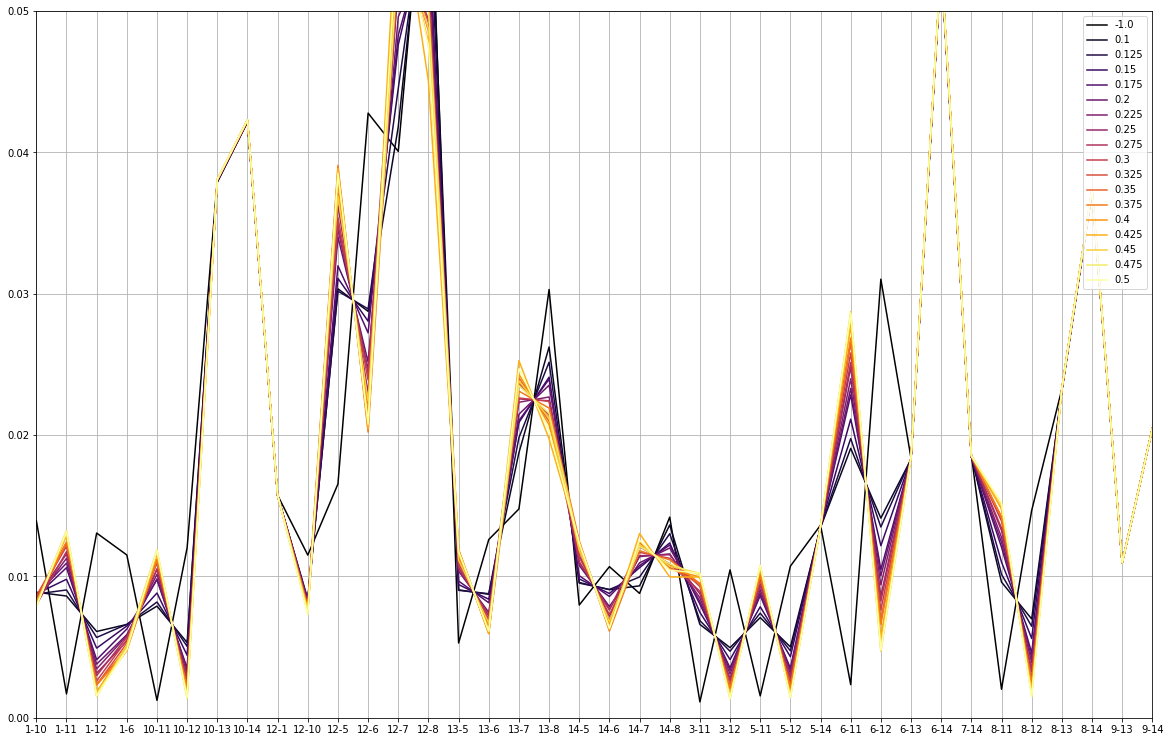

In [72]:

fig, ax = plt.subplots(figsize=(20,13))
parallel_coordinates(df_new, 'beta', axvlines= False, colormap="inferno")
ax.set_ylim(0,0.05)
plt.show()

In [73]:
df_new = df_new.drop(columns=["beta"])
for index, row in df_new.iterrows():
    print(scipy.spatial.distance.euclidean(df_new.iloc[:,0], df_new.iloc[:,index]))

0.0
0.019638914594975403
0.022263812098752625
0.011988016771369445
0.0167482219171292
0.023532696185960485
0.12476426171026227
0.14262682877455266
0.03057185187668912
0.0031983805834291897
0.11294033043982424
0.07046398722681978
0.18430956150960404
0.18732248744857105
0.0142653584347721
0.006310002041112839
0.05967613167297418
0.06021077823458138
